# Apresentação:

O objetivo desse código é estudar sobre o mecanismo de atenção. Além de explicar sobre o mecânismo tradicional, o livro também abordará o uma versão causal do mecânismo de atenção.

**Este capítulo abrange:**
- As razões para o uso de **mecanismos de atenção** em redes neurais.

- Um framework básico de busca de autoatenção (_self-attention_), progredindo para um mecanismo de autoatenção aprimorado.

- Um módulo de **atenção causal** que permite que Grandes Modelos de Linguagem (LLMs) gerem um token por vez.

- O uso de _dropout_ para mascarar pesos de atenção selecionados aleatoriamente, visando reduzir o sobreajuste (_overfitting_).

- O empilhamento de múltiplos módulos de **atenção causal** em um módulo de atenção de múltiplas cabeças (_multi-head attention_).

In [1]:
import sys
import os
from pathlib import Path

# Encontra o diretório raiz do projeto (onde está a pasta 'utils')
notebook_dir = Path.cwd()
root_dir = notebook_dir.parent.parent  # Sobe dois níveis

# Adiciona ao sys.path
if str(root_dir) not in sys.path:
    sys.path.insert(0, str(root_dir))

In [2]:
from utils.utilities import get_image

# Problemas com 

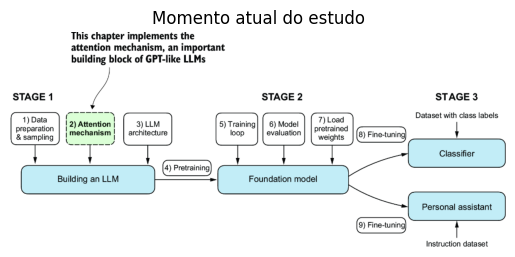

In [5]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781633437166/files/Images/3-1.png",
    title="Momento atual do estudo"
)

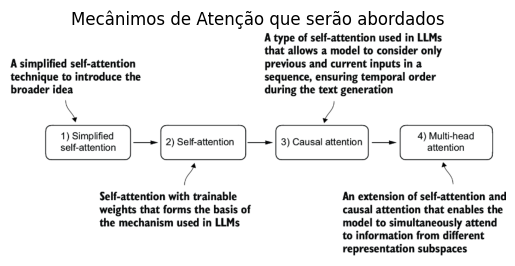

In [6]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781633437166/files/Images/3-2.png",
    title="Mecânimos de Atenção que serão abordados"
)

# O problema com a modelagem de sequências longas

Já vimos que a arquitetura [Transformer](https://arxiv.org/abs/1706.03762) nasce como um modelo de tradução. Traduzir texto entre línguas não pode ser feito palavra por palavra, porque cada idioma tem sua própria estrutura gramatical e depende fortemente de contexto.

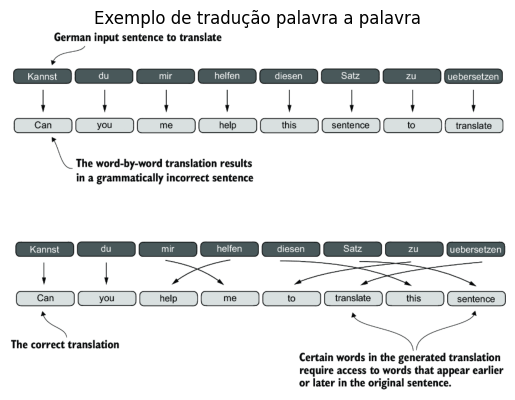

In [7]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781633437166/files/Images/3-3.png",
    title="Exemplo de tradução palavra a palavra"
)

Para lidar com isso, modelos clássicos de tradução automática usavam uma arquitetura _encoder–decoder_:

- O **_encoder_** lê toda a frase de entrada e a transforma em uma representação vetorial compacta;
- O **_decoder_** usa essa representação para gerar a frase traduzida, token por token. Antes dos transformers, os RNNs eram amplamente usados nesse papel por conseguirem processar dados sequenciais.

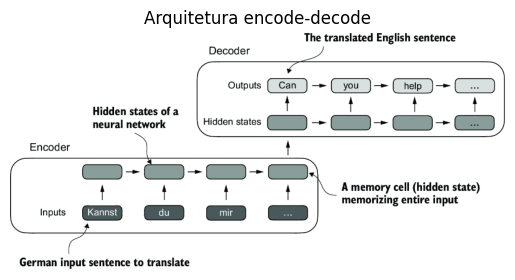

In [8]:
get_image(
    "https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781633437166/files/Images/3-4.png",
    title="Arquitetura encode-decode"
)

Antes dos transformers, os **RNNs (_Recurrent Neural Networks_)** eram amplamente usados nesse papel por conseguirem processar dados sequenciais. A grande limitação das **RNNs** do tipo _encoder-decoder_ (encoder-decoder) é que a **RNN** não consegue acessar diretamente **estados ocultos (_hidden states_)** anteriores do _encoder_ durante a fase de _decoder_. 

Consequentemente, ela depende exclusivamente do estado oculto atual, que encapsula toda a informação relevante. Isso pode levar a uma perda de contexto, especialmente em frases complexas onde as dependências podem abranger longas distâncias.

Essa limitação estrutural foi o principal fator que motivou o surgimento dos **mecanismos de atenção (_attention mechanisms_)**, que permitem ao modelo focar dinamicamente em diferentes partes da entrada ao longo da geração da saída.

**Nota:**

Existem vários tipos de atenção, o livro mensiona o **Bahdanau attention**, um mecânismo de atenção criado para **RNNs**, mas existem outros. Listei alguns que encontrei na minha pesquisa própria.

- [Bahdanau Attention](https://arxiv.org/abs/1409.0473);
- [Luong Attention](https://arxiv.org/abs/1508.04025);
- [Self Attention (Artigo original do Transformer)](https://arxiv.org/abs/1706.03762);

Também vou deixar aqui um artigo interessante da **IBM** falando sobre o assunto.

- [IBM - attention-mechanism](https://www.ibm.com/br-pt/think/topics/attention-mechanism)

# Mecanismo de Atenção sem pesos
https://aclanthology.org/2020.findings-emnlp.49.pdf

# Mecanismo de atenção com pesos

In [ ]:
#